In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import inf
import numpy as np

In [2]:
df = pd.read_csv('single_trial.csv')
df.head()

,Straight line current,Bar 5 current,Bar 4 current,Bar 3 current,Bar 2 current,Bar 1 current,Circle current
0,0.2468,1.5534,1.7466,1.9482,2.2501,2.652,2.7529


In [3]:
df = df.T
df.head()

,0
Straight line current,0.2468
Bar 5 current,1.5534
Bar 4 current,1.7466
Bar 3 current,1.9482
Bar 2 current,2.2501


In [4]:
radii = [inf, 0.1154, 0.1030, 0.0902, 0.0775, 0.0648, 0.06]
radii = [radius/2 for radius in radii]
voltages = [20,20, 20, 20, 20, 20, 20]
df['radius'] = radii
df['voltage'] = voltages
df

,0,radius,voltage
Straight line current,0.2468,inf,20
Bar 5 current,1.5534,0.05770,20
Bar 4 current,1.7466,0.05150,20
Bar 3 current,1.9482,0.04510,20
Bar 2 current,2.2501,0.03875,20
Bar 1 current,2.6520,0.03240,20
Circle current,2.7529,0.03000,20


In [5]:
# rename first column to current
df.rename(columns={0:'current'}, inplace=True)
df.head()

,current,radius,voltage
Straight line current,0.2468,inf,20
Bar 5 current,1.5534,0.05770,20
Bar 4 current,1.7466,0.05150,20
Bar 3 current,1.9482,0.04510,20
Bar 2 current,2.2501,0.03875,20


In [6]:
def y_calc(current, voltage):
    y = current**2
    return y

def x_calc(distance):
    x = 1/distance**2
    return x

In [7]:
df['y'] = df.apply(lambda row: y_calc(row['current'], row['voltage']), axis=1)
df['x'] = df.apply(lambda row: x_calc(row['radius']), axis=1)
df.head()

,current,radius,voltage,y,x
Straight line current,0.2468,inf,20,0.060910,0.000000
Bar 5 current,1.5534,0.05770,20,2.413052,300.364342
Bar 4 current,1.7466,0.05150,20,3.050612,377.038364
Bar 3 current,1.9482,0.04510,20,3.795483,491.639667
Bar 2 current,2.2501,0.03875,20,5.062950,665.972945


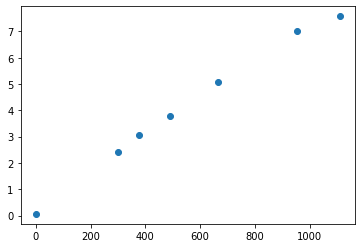

In [8]:
plt.plot(df['x'], df['y'], 'o')

In [9]:
# fit a line to the data
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])
print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value}')
print(f'p_value: {p_value}')
print(f'std_err: {std_err}')

slope: 0.0068501632650158914
intercept: 0.3268093478057228
r_value: 0.9964920715099534
p_value: 1.397217554275494e-06
std_err: 0.0002572771602054151


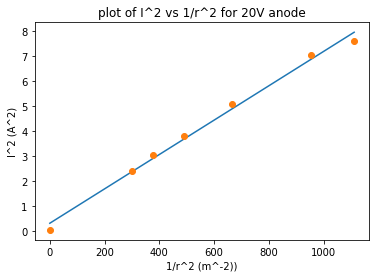

In [15]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    x_vals = np.array(df['x'])
    y_vals = intercept + slope * x_vals
    return x_vals, y_vals


x, y = abline(slope, intercept)
plt.plot(x,y)
plt.plot(df['x'], df['y'], 'o')
plt.title("plot of I^2 vs 1/r^2 for 20V anode")
plt.xlabel("1/r^2 (m^-2))")
plt.ylabel("I^2 (A^2)")
plt.savefig("plot.png")
plt.show()




In [11]:
def m_e(slope, mean_rad, voltage, N, const):
    y = const * (mean_rad**2) * (voltage)
    y = y/N**2
    m_e = slope/y
    return m_e

In [12]:
#print in scientific notation
answer = (1/m_e(slope, 0.33, 20, 72, 2.7e12))
print(f'{answer:.2e}')

1.66e+11
